# Encoding

In [ ]:
pip install plotly

In [ ]:
import matplotlib.pyplot       as plt
import matplotlib as mpl
import seaborn                 as sns
import os
import numpy

In [ ]:
%%time
import gzip
import string

import nltk # imports the natural language toolkit
import pandas as pd
import plotly.express as px

nltk.download('punkt')

CPU times: user 1.19 s, sys: 184 ms, total: 1.37 s
Wall time: 2.23 s


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Ejercicios ciencia de datos/instagram_data.csv')

# EDA

In [ ]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [ ]:
df.describe(include='all')

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
count,11692,11690,11690,11690,11531,11690,11690,1.168900e+04,4523,11689,11689,9577,9.577000e+03,9.577000e+03
unique,932,930,8235,3,8021,1044,5267,NaN,1671,8262,2,622,NaN,NaN
top,184378318,mensfashions,C0tHo6btnfo,False,Aamiin ... 🙏💝🙏,0,0,NaN,"{'id': '6889842', 'has_public_page': True, 'na...",https://scontent-lhr8-2.cdninstagram.com/v/t39...,False,mensfashions,NaN,NaN
freq,67,67,5,7242,16,542,40,NaN,146,2,7736,67,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.682416e+09,NaN,NaN,NaN,NaN,2.460785e+06,4.932806e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.432766e+07,NaN,NaN,NaN,NaN,1.606651e+07,7.837775e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.315681e+09,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.689106e+09,NaN,NaN,NaN,NaN,2.104850e+05,2.940000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706069e+09,NaN,NaN,NaN,NaN,5.217490e+05,6.850000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.708597e+09,NaN,NaN,NaN,NaN,1.337823e+06,1.167000e+03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11692 entries, 0 to 11691
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owner_id         11692 non-null  object 
 1   owner_username   11690 non-null  object 
 2   shortcode        11690 non-null  object 
 3   is_video         11690 non-null  object 
 4   caption          11531 non-null  object 
 5   comments         11690 non-null  object 
 6   likes            11690 non-null  object 
 7   created_at       11689 non-null  float64
 8   location         4523 non-null   object 
 9   imageUrl         11689 non-null  object 
 10  multiple_images  11689 non-null  object 
 11  username         9577 non-null   object 
 12  followers        9577 non-null   float64
 13  following        9577 non-null   float64
dtypes: float64(3), object(11)
memory usage: 1.2+ MB


In [ ]:
df.shape

(11692, 14)

# Ingeniería de atributos

## Definir variables disponibles

### Dimensiones:

* owner_id: Integer (Unique identifier for the owner of the Instagram account)
* owner_username: String (Username of the owner of the Instagram account)
* shortcode: String (Unique identifier for the post)
* is_video: Boolean (Indicator if the post is a video or not)
* caption: String (Caption text accompanying the post)
* created_at: Integer (Timestamp indicating the creation time of the post)
* location: String (Location associated with the post, if any)
* imageUrl: String (URL of the image associated with the post)
* multiple_images: Boolean (Indicator if the post contains multiple images)
* username: String (Username of the Instagram account)


### Medidas:

* likes: Integer (Number of likes on the post)
* comments: Integer (Number of comments on the post)
* followers: Integer (Number of followers of the Instagram account)
* following: Integer (Number of accounts the Instagram account is following)


In [ ]:
# Contar % de datos nulos

porcentaje_nulos = df.isnull().mean() * 100

# Mostrar el resultado
print(porcentaje_nulos)

owner_id            0.000000
owner_username      0.017106
shortcode           0.017106
is_video            0.017106
caption             1.377010
comments            0.017106
likes               0.017106
created_at          0.025659
location           61.315429
imageUrl            0.025659
multiple_images     0.025659
username           18.089292
followers          18.089292
following          18.089292
dtype: float64


### Se eliminan columnas que no son relevantes para el análisis de datos y aquellas que tienen datos nulos superiores al 20%

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["owner_id", "owner_username", "shortcode",
                       "location", "imageUrl", "username"]

# Eliminar las columnas del DataFrame df
df = df.drop(columnas_a_eliminar, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11692 entries, 0 to 11691
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_video         11690 non-null  object 
 1   caption          11531 non-null  object 
 2   comments         11690 non-null  object 
 3   likes            11690 non-null  object 
 4   created_at       11689 non-null  float64
 5   multiple_images  11689 non-null  object 
 6   followers        9577 non-null   float64
 7   following        9577 non-null   float64
dtypes: float64(3), object(5)
memory usage: 730.9+ KB


In [ ]:
df.head()

,is_video,caption,comments,likes,created_at,multiple_images,followers,following
0,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,True,2144626.0,1021.0
1,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,False,2144626.0,1021.0
2,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,False,2144626.0,1021.0
3,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,False,2144626.0,1021.0
4,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,False,2144626.0,1021.0


## Se analizan las variables para saber como están ditribuidos los datos y posteriormente se hacen los remplazos de los valores NaN

<ipython-input-14-160816ea9227>:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


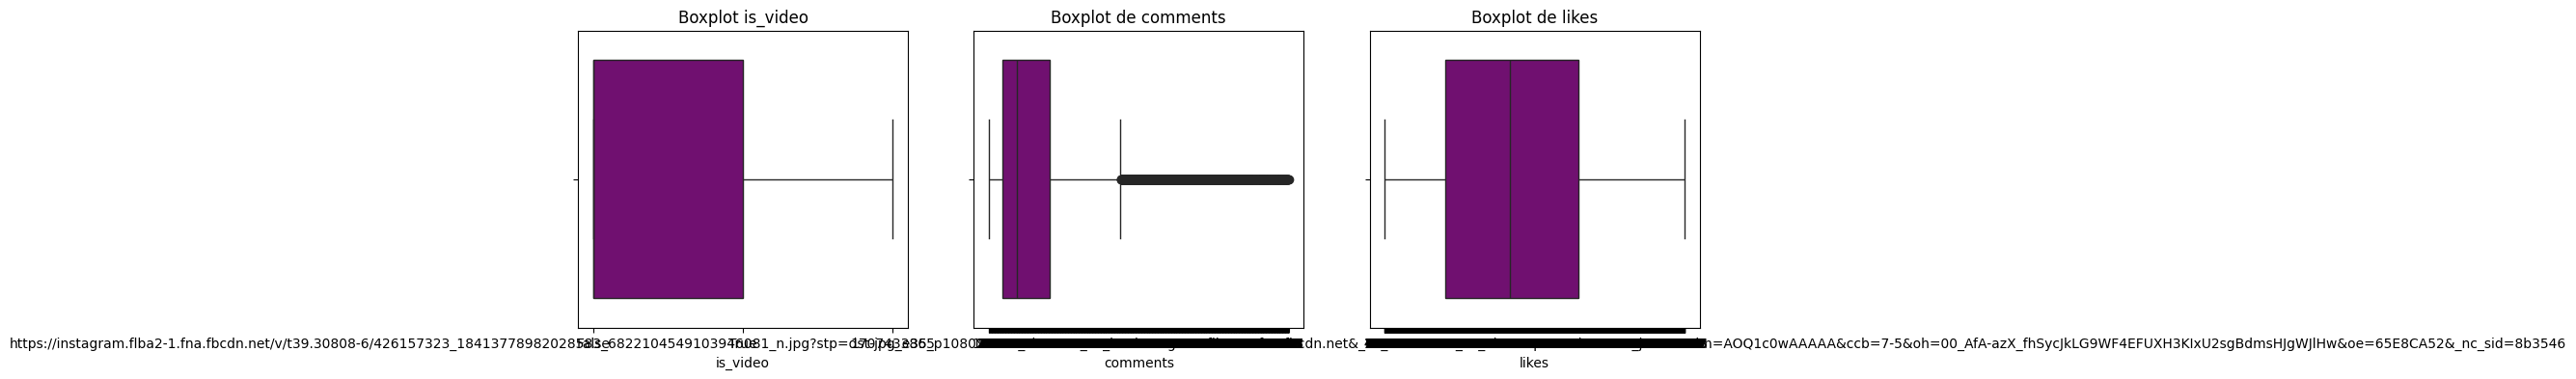

In [ ]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna is_video
sns.boxplot(ax=axes[0], x="is_video", data=df, color = 'purple')
axes[0].set_xlabel('is_video')
axes[0].set_title('Boxplot is_video')

# Boxplot para la columna comments
sns.boxplot(ax=axes[1], x="comments", data=df, color = 'purple')
axes[1].set_xlabel('comments')
axes[1].set_title('Boxplot de comments')

# Boxplot para la columna likes
sns.boxplot(ax=axes[2], x="likes", data=df, color = 'purple')
axes[2].set_xlabel('likes')
axes[2].set_title('Boxplot de likes')

# Ajustar el espacio entre los subplots
plt.tight_layout()

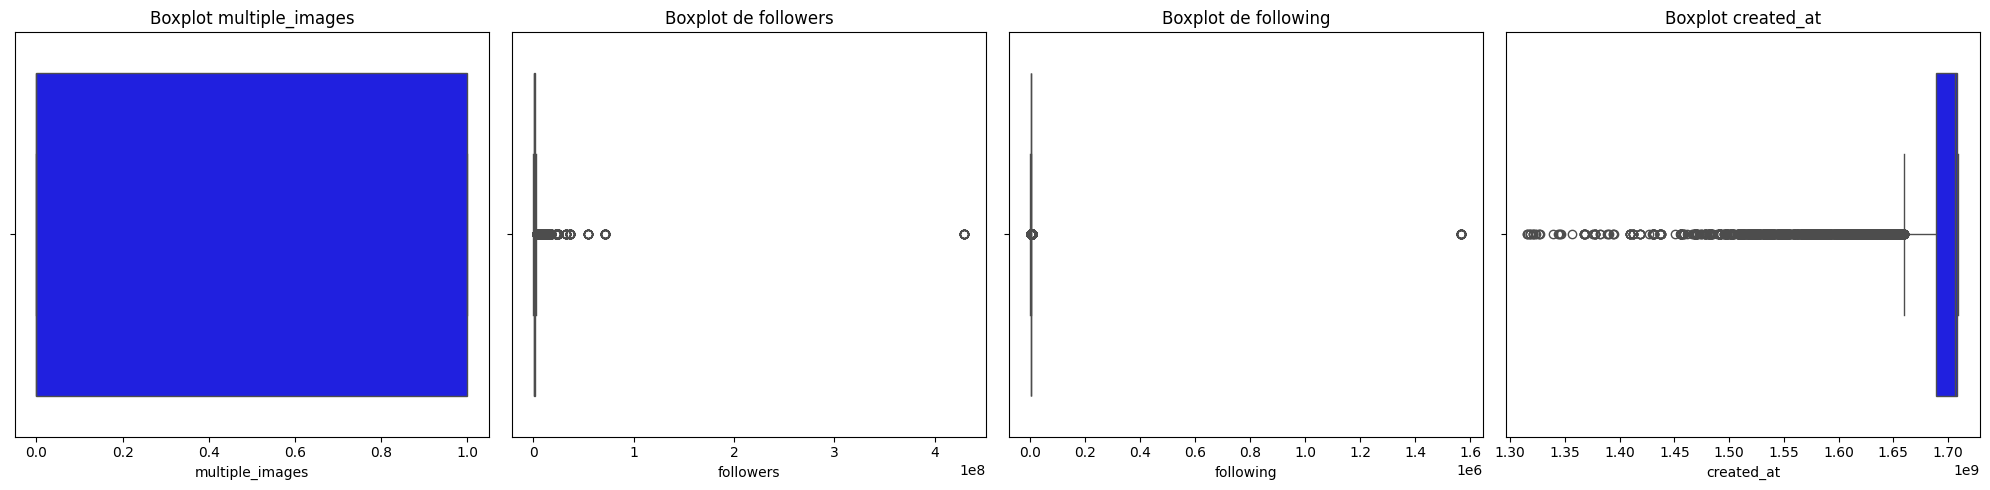

In [ ]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Boxplot para la columna multiple_images
sns.boxplot(ax=axes[0], x="multiple_images", data=df, color = 'blue')
axes[0].set_xlabel('multiple_images')
axes[0].set_title('Boxplot multiple_images')

# Boxplot para la columna followers
sns.boxplot(ax=axes[1], x="followers", data=df, color = 'blue')
axes[1].set_xlabel('followers')
axes[1].set_title('Boxplot de followers')

# Boxplot para la columna following
sns.boxplot(ax=axes[2], x="following", data=df, color = 'blue')
axes[2].set_xlabel('following')
axes[2].set_title('Boxplot de following')

# Boxplot para la columna created_at
sns.boxplot(ax=axes[3], x="created_at", data=df, color = 'blue')
axes[3].set_xlabel('created_at')
axes[3].set_title('Boxplot created_at')

# Ajustar el espacio entre los subplots
plt.tight_layout()

In [ ]:
# Convertir tipos de datos en el data frame

df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['following'] = pd.to_numeric(df['following'], errors='coerce')
df['created_at'] = pd.to_numeric(df['created_at'], errors='coerce')

In [ ]:
# Imputar datos de las columnas que tienen datos nulos inferiores al 20%

media_2 = df['likes'].mean()
df['likes'].fillna(media_2, inplace=True)

media_3 = df['multiple_images'].mean()
df['multiple_images'].fillna(media_3, inplace=True)

media_4 = df['created_at'].mean()
df['created_at'].fillna(media_4, inplace=True)

mediana_1 = df['comments'].median()
df['comments'].fillna(mediana_1, inplace=True)

mediana_2 = df['followers'].median()
df['followers'].fillna(mediana_2, inplace=True)

mediana_3 = df['following'].median()
df['following'].fillna(mediana_3, inplace=True)

In [ ]:
# Imputar datos de la columna que necesitan ser remplazados por los valores de la moda

# Calcular la moda de la columna 'is_video'
moda_1 = df['is_video'].mode()[0]

# Reemplazar los valores NaN por la moda
df['is_video'].fillna(moda_1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11692 entries, 0 to 11691
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_video         11692 non-null  object 
 1   caption          11531 non-null  object 
 2   comments         11692 non-null  float64
 3   likes            11692 non-null  float64
 4   created_at       11692 non-null  float64
 5   multiple_images  11692 non-null  object 
 6   followers        11692 non-null  float64
 7   following        11692 non-null  float64
dtypes: float64(5), object(3)
memory usage: 730.9+ KB


#EDA

In [ ]:
from plotly.subplots import make_subplots
# Nombre de las columnas para los histogramas
columna_histograma_followers = 'followers'
columna_histograma_following = 'following'

# Crear subgráficos
fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Histograma de {columna_histograma_followers}', f'Histograma de {columna_histograma_following}'])

# Añadir histograma de 'followers'
histograma_followers = px.histogram(df, x=columna_histograma_followers) #Califiaciones de películas
fig.add_trace(histograma_followers['data'][0], row=1, col=1)

# Añadir histograma de 'following'
histograma_following = px.histogram(df, x=columna_histograma_following) #Fechas de reviews
fig.add_trace(histograma_following['data'][0], row=1, col=2)

# Ajustar el diseño de la figura
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)

fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

# Nombre de las columnas para los gráficos de torta
columna_torta_is_video = 'is_video'
columna_torta_multiple_images = 'multiple_images'

# Crear subgráficos con tipo 'pie'
fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Gráfico de Torta de {columna_torta_is_video}', f'Gráfico de Torta de {columna_torta_multiple_images}'], specs=[[{'type': 'pie'}, {'type': 'pie'}]])

# Añadir gráfico de torta de 'is_video'
torta_is_video = px.pie(df, names=columna_torta_is_video)
fig.add_trace(torta_is_video['data'][0], row=1, col=1)

# Añadir gráfico de torta de 'multiple_images'
torta_multiple_images = px.pie(df, names=columna_torta_multiple_images)
fig.add_trace(torta_multiple_images['data'][0], row=1, col=2)

# Ajustar el diseño de la figura
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)

# Mostrar la figura
fig.show()

## Encontrar las palabras má frecuentes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


def get_top_n_words(corpus, n=1, k=1):
    """
    Función para obtener las 'n' palabras más frecuentes en un corpus de texto con n-gramas de tamaño 'k'.

    Parámetros:
    - corpus: Lista de documentos de texto.
    - n: Número de palabras más frecuentes a obtener (por defecto, 1).
    - k: Tamaño del n-grama (por defecto, 1).

    Devuelve:
    - Una lista de tuplas donde cada tupla contiene una palabra y su frecuencia.
    """
    # Iniciar el temporizador
    t1 = datetime.now()

    # Crear un objeto CountVectorizer con el rango de n-gramas y las stop words en inglés
    vec = CountVectorizer(ngram_range=(k, k), stop_words="english")

    # Transformar el corpus en una matriz de recuentos de palabras
    bag_of_words = vec.fit_transform(corpus)

    # Sumar las palabras por columna para obtener la frecuencia total
    sum_words = bag_of_words.sum(axis=0)

    # Crear una lista de tuplas (palabra, frecuencia) ordenada por frecuencia de mayor a menor
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Detener el temporizador y mostrar el tiempo de ejecución
    t2 = datetime.now()
    print("Tiempo de ejecución:", t2 - t1)

    # Devolver las 'n' palabras más frecuentes
    return words_freq[:n]

In [ ]:
# Eliminar filas con valores NaN en la columna 'caption'
df_clean = df.dropna(subset=['caption'])

# Obtener las 10 palabras más frecuentes
top_words = get_top_n_words(df_clean['caption'], n=10, k=1)
print(top_words)

Tiempo de ejecución: 0:00:01.015041
[('que', 1459), ('new', 1196), ('love', 1128), ('la', 1097), ('day', 1067), ('like', 1045), ('time', 1041), ('en', 998), ('link', 958), ('just', 876)]


In [ ]:
# Eliminar filas con valores NaN en la columna 'caption'
df_clean = df.dropna(subset=['caption'])

# Obtener las 10 palabras más frecuentes
common_words = get_top_n_words(df_clean['caption'], 20, 1)
for word, freq in common_words:
    print(word, freq)

Tiempo de ejecución: 0:00:00.952665
que 1459
new 1196
love 1128
la 1097
day 1067
like 1045
time 1041
en 998
link 958
just 876
ve 846
bio 832
year 741
life 709
el 704
com 673
years 606
make 587
know 582
work 552


In [ ]:
df_1 = pd.DataFrame(common_words, columns=["words", "count"])
df_1

,words,count
0,que,1459
1,new,1196
2,love,1128
3,la,1097
4,day,1067
5,like,1045
6,time,1041
7,en,998
8,link,958
9,just,876


In [ ]:
#Agrupamos palabras y sumamos las frecuencias
word_counts = df_1.groupby("words").sum()["count"].sort_values(ascending=False) #orden descendente

# Crear un gráfico de barras con Plotly Express
fig = px.bar(x=word_counts.index, y=word_counts.values, title="Top 20 words from all reviews", labels={"x": "Words", "y": "Count"})

# Mostrar el gráfico
fig.show()

## Comentarios positivos

In [ ]:
# Ver cuantos "likes" en promedio existen en la columna "likes"

promedio_likes = df['likes'].mean()

print("Promedio de likes:", promedio_likes)

Promedio de likes: 32109.932586192146


In [ ]:
%%time
# reviews Positivos con más de 32109 likes por palabra
good_indices = df["likes"] > 32109
good_reviews = df[good_indices]

good_reviews = good_reviews.dropna(subset=['caption']) # Código para eliminar los valores NaN de la columna "caption"

common_words = get_top_n_words(good_reviews["caption"], 20)
for word, freq in common_words:
    print(word, freq)

Tiempo de ejecución: 0:00:00.107025
que 183
la 152
love 136
like 125
en 107
just 103
el 102
life 96
new 94
time 94
ve 84
know 81
di 80
day 72
best 72
years 68
year 67
make 64
por 63
things 62
CPU times: user 121 ms, sys: 34 µs, total: 121 ms
Wall time: 125 ms


## Comentarios negativos

In [ ]:
%%time
# reviews Positivos con menos de 5 likes por palabra
bad_indices = df["likes"] < 5
bad_reviews = df[bad_indices]

bad_reviews = bad_reviews.dropna(subset=['caption']) # Código para eliminar los valores NaN de la columna "caption"

common_words_1 = get_top_n_words(bad_reviews["caption"], 20)
for word, freq in common_words_1:
    print(word, freq)

Tiempo de ejecución: 0:00:00.024226
incl 11
sydney 9
condition 8
excellent 7
australia 6
beinggentlemen 6
motivation 6
inspiration 6
beingclassy 6
age 6
chocolate 6
cruise 4
sydneyharbourbridge 4
mocha 4
bars 4
rawcake 4
rawbaking 4
sydneyoperahouse 3
seeaustralia 3
day 3
CPU times: user 19.8 ms, sys: 59 µs, total: 19.9 ms
Wall time: 68.1 ms


In [ ]:
#Pasamos a dataframe review negativa
df_1 = pd.DataFrame(common_words_1, columns=["words", "count"])

#Graficamos con el dataframe a review
word_counts = df_1.groupby("words").sum()["count"].sort_values(ascending=False)
fig = px.bar(df_1, x='words', y='count', title='Top 20 words from bad reviews')

# Mostrar el gráfico
fig.show()

### **Consigna: Análisis de Palabras Indicativas en Buenas y Malas Reseñas**


El objetivo de este ejercicio es analizar las palabras más indicativas en dos conjuntos de reseñas: "good reviews" y "bad reviews". Utilizaremos un enfoque de visualización de palabras clave para identificar las diferencias en el lenguaje utilizado en ambos conjuntos.
Pasos:


*   **Análisis de Palabras Indicativas:**

Definir una función que encuentre y visualice las palabras más indicativas en ambos conjuntos de reseñas.
Utilizar herramientas como Counter para analizar la frecuencia de las palabras.
Crear un gráfico de barras horizontales para mostrar las palabras más indicativas.

*   **Visualización Comparativa:**

Utilizar la función definida para visualizar las palabras más indicativas en "good reviews" y "bad reviews".
Observar y comparar las diferencias en las palabras utilizadas en ambos conjuntos.

In [ ]:
%%time
from collections import Counter

def get_indicative_words(text1, text2, n=20):
    # Crear contadores para cada texto
    c1 = Counter(text1.lower().split(" "))
    c2 = Counter(text2.lower().split(" "))

    # Encontrar las palabras más indicativas en ambos textos
    ind_words_1 = (c1 - c2).most_common(n)  # Palabras más indicativas en text1
    ind_words_2 = (c2 - c1).most_common(n)  # Palabras más indicativas en text2

    # Imprimir las palabras más indicativas
    print(f"Palabras más indicativas en text1: {[word for word, _ in ind_words_1]}")
    print(f"Palabras más indicativas en text2: {[word for word, _ in ind_words_2]}")

    # Extraer las palabras y sus frecuencias para el segundo texto
    x, y = zip(*ind_words_2)

    # Crear un DataFrame para visualización
    df_2 = pd.DataFrame({'word': x, 'count': y})

    # Crear un gráfico de barras horizontales
    fig = px.bar(df_2, x='count', y='word', orientation='h', title='Top Words from all Reviews')

    # Ajustar el diseño de la figura
    fig.update_layout(
        width=600,
        height=600,
        xaxis_title='Count',
        yaxis_title='Word',
      )

     # Mostrar el gráfico
    fig.show()

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 26 µs


In [ ]:
#Aplicar nuestra función a las reviews positivas y negativos (ambos textos)

get_indicative_words(' '.join(good_reviews['caption']), ' '.join(bad_reviews['caption']))

Palabras más indicativas en text1: ['the', 'to', 'a', 'and', 'i', 'of', 'in', 'for', 'you', 'my', 'with', 'is', 'this', 'on', 'it', 'that', 'so', 'de', 'we', '-']
Palabras más indicativas en text2: ['incl', 'p&p.', 'excellent', 'condition.', '#beinggentlemen', '#motivation', '#inspiration', '#beingclassy', '#sydney', '#sydneyharbourbridge', 'mocha', '#rawbaking', '#sydneyoperahouse', '#seeaustralia', 'louis', 'vuitton', '#tourabu', '#beach', '@australia', 'sydney,']


###Inspeccionemos manualmente las primeras 10 reseñas negativas que contengan la palabra "love". ¿Que notaste? ¿Cómo sugiere esto que debemos proceder a continuación?

###Una posible solución se da a continuación. Tenga en cuenta que el uso de códigos de escape Ansi para colorear es un "buen extra" y no se espera necesariamente de las soluciones de los estudiantes:

In [ ]:
#Filtramos reviews muy malas y vamos a buscar la palabra "love" dentro de esos textos

#Categorías de comentarios con "likes" por debajo de 32109
v_bad_indices = df["likes"] < 32109
v_bad_reviews = df[v_bad_indices]

# Definición de códigos ANSI para resaltar texto en rojo; fuente de colores: https://gist.github.com/rene-d/9e584a7dd2935d0f461904b9f2950007
RED_START = "\033[91m"
END = "\033[0m"

# Filtrar los valores NaN en la columna "caption" de v_bad_reviews
v_bad_reviews = v_bad_reviews.dropna(subset=['caption'])

# Búsqueda de Reseñas con la Palabra 'love'
good_word_bad_review = [rev for rev in v_bad_reviews['caption'] if 'love' in rev.lower()]

# Impresión de Reseñas con Destacado de la Palabra 'love'
print(len(good_word_bad_review))
for rev in good_word_bad_review[:1000]:
    love_i = rev.lower().index("love")

    # Adición de códigos ANSI para hacer un resaltado de la palabra 'love'
    print(rev[love_i-50: love_i] + RED_START + rev[love_i:love_i+4] + END + rev[love_i+4:love_i +50])

1392
love how flawless it came out! 

Concealer @domini
ong time. she’s an actress that moved to LA from Slovenia. super down to earth and fun to chat with,
. I hope you like it! 🙌

#stopmotions #stopmotionslovers #stopmotionvideo #stopmotionanimation #roug
ing my work this year, I hope you spend with your loved ones and friends this Christmas.
ll known Croatian actor, kayaker and a father who loves spending time on the Mrežnica River shared h
#959komfort #porsche #959 #porscheclassic #porschelove #porschelife #porschevintage
husiast content. 
-
-
-
-
-
-
Credit: The Spy Who Loved Me (1977) 
#classicdriver #carculture #class
#993turbo #993gt2 #porschelife #aircooled #porschelove #porscheturbo #porsche
ferrari365 #Ferrari #365GTC #ferraridaily #ferrarilove #ferrariclassic #ferrarilovers #ferrariclub
me, it was the wrong time of year as they tend to love the hot desert nights. We did however find a 
love making a round of shots at home before a dinn
proclaimed margarita queen, it’s no se

## Revisar las criticas que contienen la palabra "love"

####Revise la lista de malas críticas que contienen la palabra "love" que encontramos en la última pregunta. Para cada revisión, extraiga lo siguiente:

1. La primera palabra después de "love"
2. La primera palabra después de "love" que es un sustantivo o cardinal
3. La última palabra antes de "love" que es un sustantivo o cardinal

## 1. La primera palabra después de "love"

In [ ]:
import re

# Lista que almacena las palabras que siguen a 'love' en las reseñas
post_love = []

# Bucle para procesar las reseñas
for sentence in good_word_bad_review:
    # Expresión regular para extraer la palabra después de 'love'
    post = re.search("love.?\W*(\w+).*\s?", sentence, re.IGNORECASE)
    # Si se encuentra una palabra después de 'love', se agrega a la lista
    if post:
        post_love.append(post.groups()[0])

# Filtrar elementos vacíos en la lista
post_love = [i for i in post_love if i]

# Imprimir las primeras 10 palabras que siguen a 'love'
print(post_love[0:10])

['how', 'ia', 's', 'ones', 'spending', 'porschelife', 'Me', 'porscheturbo', 'ferrariclassic', 'the']


## 2. La primera palabra después de "love" que es un sustantivo o cardinal

**POS (Part of Speech)** que representan ciertas categorías gramaticales o clases de palabras en inglés. Estos códigos POS se utilizan comúnmente en el etiquetado POS para identificar la función gramatical de cada palabra en una oración. En este caso, la elección de estos códigos POS específicos se basa en la intención de capturar ciertos tipos de palabras que podrían ser consideradas interesantes en el contexto de reseñas.

*   **CD (Cardinal Number):** Números cardinales, como "one," "two," "three," etc. Estos podrían ser relevantes si se desea identificar reseñas que mencionan cantidades específicas.

*   **FW (Foreign Word):** Palabras extranjeras. Pueden ser interesantes si las reseñas contienen términos o palabras en otros idiomas.

*   **NN (Noun, singular or mass):** Sustantivos en singular o en masa. Captura sustantivos que podrían ser sustantivos descriptivos.

*   **NNS (Noun, plural):** Sustantivos en plural. Similar a NN pero para sustantivos en plural.

*   **NNP (Proper Noun, singular):** Sustantivos propios en singular. Pueden ser nombres específicos de personas, lugares, marcas, etc.

*   **NNPS (Proper Noun, plural):** Sustantivos propios en plural. Similar a NNP pero para sustantivos propios en plural.

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

# Lista de códigos POS (Part of Speech) considerados interesantes
love_pos = ['CD', 'FW', 'NN', 'NNS', 'NNP', 'NNPS']

# Función para extraer palabras interesantes basadas en códigos POS
def extract_interesting(sentence, love):
    # Tokenizar la oración en palabras
    words = nltk.word_tokenize(sentence)
    # Filtrar palabras basadas en los códigos POS considerados interesantes
    interesting = [k for k, v in nltk.pos_tag(words) if v in love]
    return interesting

# Función para encontrar la siguiente palabra interesante después de 'love'
def next_word2(sentence):
    # Encontrar todas las coincidencias de 'love' seguido de cualquier cosa
    post = re.findall(r'love.*', sentence)

# Si hay al menos una coincidencia
    if len(post) > 0:
        # Extraer palabras interesantes basadas en códigos POS
        interesting = extract_interesting(post[0], love_pos)

        # Si hay al menos una palabra interesante, devolverla
        if len(interesting) > 0:
            return interesting[0]
        else:
            return ''
    else:
        return ''

# Búsqueda de palabras interesantes después de 'love' en las primeras 1000 reseñas
post_love2 = [next_word2(sentence) for sentence in good_word_bad_review[:1000]]

# Filtrar elementos vacíos en la lista
post_good2 = [i for i in post_love2 if i]

# Imprimir las primeras 10 palabras interesantes después de 'love'
print(post_love2[:10])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['', 'lovenia', 'lovers', 'ones', 'loves', 'porschevintage', '', 'porsche', 'ferrarilovers', 'desert']


##3. La última palabra antes de "love" que es un sustantivo o cardinal

In [ ]:
# Función para extraer palabras antes de que aparezca la palabra "love"
def prev_word(sentence):
    # Encontrar todas las coincidencias de cualquier cosa seguida de 'good'
    post = re.findall(r'.*?love', sentence)

    # Si hay al menos una coincidencia
    if len(post) > 0:
        # Extraer palabras interesantes basadas en códigos POS
        temp = extract_interesting(post[0], love_pos)

        # Si hay al menos una palabra interesante, devolver la última
        if len(temp) > 0:
            return temp[len(temp)-1]
        else:
            return ''
    else:
        return ''

# Búsqueda de palabras antes de 'love' en las primeras 1000 reseñas positivas
pre_love = [prev_word(sentence) for sentence in good_word_bad_review[:1000]]

# Filtrar elementos vacíos en la lista
pre_love = [i for i in pre_love if i]

# Imprimir las primeras 10 palabras antes de 'love'
print(pre_love[:10])

['coverage', 'Slove', 'stopmotions', 'love', 'father', 'porschelove', 'porschelove', '365GTC', 'year', 'time']


# n-grams

###Hemos visto que las palabras individuales no siempre son muy informativas. Busque los bigramas y trigramas más informativos, tanto en reseñas positivas como negativas. Muestre los bigramas y trigramas más informativos y haga un breve análisis de los n-gramas que identificó.

In [ ]:
#Analizar n-grams con n = 1

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=1, k=1):
    # Crear un objeto CountVectorizer con el rango de n-gramas especificado y eliminar stop words en inglés
    vec = CountVectorizer(ngram_range=(k, k), stop_words='english').fit(corpus)

    # Transformar el corpus en una matriz de conteo de palabras
    bag_of_words = vec.transform(corpus)

    # Sumar las frecuencias de cada palabra en el corpus
    sum_words = bag_of_words.sum(axis=0)

    # Crear una lista de tuplas (palabra, frecuencia) ordenadas por frecuencia descendente
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Devolver las primeras n palabras más frecuentes
    return words_freq[:n]

In [ ]:
#Analizar bigramas
common_words = get_top_n_words(good_reviews["caption"], 20, 2)

# Imprimir los bigramas y sus frecuencias
for word, freq in common_words:
    print(word, freq)

link bio 25
luxsouthari luxresorts 22
luxresorts beabrand_marketing 22
beabrand_marketing manoelcalmon 22
manoelcalmon smporai 18
mehr fakten 16
como el 16
el nuestro 16
year old 14
en la 13
felt like 13
tiger nest 12
cassey fashiondesigner 12
la mia 12
ur fav 11
en el 11
don know 10
new year 10
feel like 10
makeup skincare 10


In [ ]:
#Pasar a dataframe los bigramas y graficarlos
df_3 = pd.DataFrame(common_words, columns=['words', 'count'])

#Agrupamos los datos
word_counts = df_3.groupby('words').sum()['count'].sort_values(ascending=False)

# Crear un gráfico de barras con Plotly
fig = px.bar(df_3, x='words', y='count', title='Top 20 bigrams from good reviews')

# Ajustar el diseño de la figura
fig.update_layout(
    xaxis_title='Bigram',
    yaxis_title='Count',
    xaxis=dict(tickangle=-45),  # Rotar las etiquetas del eje x para mayor legibilidad
    barmode='stack',  # Apilar las barras
    width=800,
    height=400
)

# Mostrar el gráfico
fig.show()

In [ ]:
#Analizamos trigramas con k = 3
common_words = get_top_n_words(good_reviews['caption'], 20, 3)
for word, freq in common_words:
    print(word, freq)

luxsouthari luxresorts beabrand_marketing 22
luxresorts beabrand_marketing manoelcalmon 22
beabrand_marketing manoelcalmon smporai 18
como el nuestro 16
amores como el 10
mehr fakten gibt 8
fakten gibt es 8
gibt es unserer 8
es unserer kostenlosen 8
unserer kostenlosen app 8
kostenlosen app download 8
app download im 8
download im app 8
im app store 8
app store oder 8
store oder play 8
oder play store 8
play store folge 8
store folge faktastisch 8
folge faktastisch für 8


In [ ]:
#Pasamos a dataset y graficamos
df_4 = pd.DataFrame(common_words, columns=['words', 'count'])

#Agrupamos por la frecuencia
word_counts = df_4.groupby('words').sum()['count'].sort_values(ascending=False)

# Crear un gráfico de barras con Plotly
fig = px.bar(df_4, x='words', y='count', title='Top 20 trigramas from good reviews')

# Ajustar el diseño de la figura
fig.update_layout(
    xaxis_title='Trigram',
    yaxis_title='Count',
    xaxis=dict(tickangle=-45),  # Rotar las etiquetas del eje x para mayor legibilidad
    barmode='stack',  # Apilar las barras
    width=1000,
    height=400
)

# Mostrar el gráfico
fig.show()

###  Transformar una oración en una nueva lista de texto emparejando iterativamente cada adjetivo en la oración con el siguiente sustantivo que le sigue en la oración y obtengo los siguintes resultados:

In [ ]:
import nltk
import re

# Descargar recursos adicionales para nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Función para obtener el primer par de adjetivo y sustantivo y la oración más corta
def grab_first_pair(sentence):
    words = nltk.word_tokenize(sentence)
    adjectives = [k for k, v in nltk.pos_tag(words) if v == 'JJ']
    if len(adjectives) > 0:
        shorter = re.findall(adjectives[0] + '.*', sentence)[0]
        words2 = nltk.word_tokenize(shorter)
        nouns = [k for k, v in nltk.pos_tag(words) if v == 'NN']
        if len(nouns) > 0:
            shorter = shorter.split(' ', 1)[1]
            return adjectives[0], nouns[0], shorter
    return '', '', ''

  # Función para obtener todos los pares de adjetivo y sustantivo de una oración
def grab_all_pairs(sentence):
    pairs = []
    noun = ''
    adj = ''
    while len(sentence) > 0:
        adj, noun, sentence = grab_first_pair(sentence)
        if adj != '':
            pairs.append(adj + ' ' + noun)
    return pairs

# Función principal para iterar sobre muchas oraciones en un corpus de (cuerpo de texto de rviews)
def make_pair_list(corpus):
    sentences = nltk.sent_tokenize(corpus)
    pairs = []
    for sentence in sentences:
        pairs.extend(grab_all_pairs(sentence))
    return pairs

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#Ejemplo de aplicación

sentence = "The big black dog scared the red cat."
print(grab_first_pair(sentence))
print(grab_all_pairs(sentence))

('big', 'dog', 'black dog scared the red cat.')
['big dog', 'black dog', 'red dog', 'red cat']


In [ ]:
#Revisión de trigramas

trigram_words = [word for word, freq in common_words]

print(trigram_words)

['luxsouthari luxresorts beabrand_marketing', 'luxresorts beabrand_marketing manoelcalmon', 'beabrand_marketing manoelcalmon smporai', 'como el nuestro', 'amores como el', 'mehr fakten gibt', 'fakten gibt es', 'gibt es unserer', 'es unserer kostenlosen', 'unserer kostenlosen app', 'kostenlosen app download', 'app download im', 'download im app', 'im app store', 'app store oder', 'store oder play', 'oder play store', 'play store folge', 'store folge faktastisch', 'folge faktastisch für']


In [ ]:
# Convertir las palabras a un formato de texto
trigram_words_text = ' '.join(trigram_words)
print(trigram_words_text)

luxsouthari luxresorts beabrand_marketing luxresorts beabrand_marketing manoelcalmon beabrand_marketing manoelcalmon smporai como el nuestro amores como el mehr fakten gibt fakten gibt es gibt es unserer es unserer kostenlosen unserer kostenlosen app kostenlosen app download app download im download im app im app store app store oder store oder play oder play store play store folge store folge faktastisch folge faktastisch für


In [ ]:
# Obtener todos los pares de adjetivo y sustantivo de una oración
all_pairs_result = grab_all_pairs(trigram_words_text)
print("Resultado de grab_all_pairs(sentence):", all_pairs_result)

Resultado de grab_all_pairs(sentence): ['manoelcalmon luxsouthari', 'nuestro manoelcalmon', 'el mehr', 'fakten mehr', 'es gibt', 'es gibt', 'unserer unserer', 'es unserer', 'unserer app', 'unserer download', 'app download', 'app download']


In [ ]:
# Obtener la lista de pares de adjetivo y sustantivo para el corpus
pair_list_result = make_pair_list(trigram_words_text)
print("Resultado de make_pair_list(corpus):", pair_list_result)

Resultado de make_pair_list(corpus): ['manoelcalmon luxsouthari', 'nuestro manoelcalmon', 'el mehr', 'fakten mehr', 'es gibt', 'es gibt', 'unserer unserer', 'es unserer', 'unserer app', 'unserer download', 'app download', 'app download']


# Conclusión

Algunos bigramas y trigramas sugieren asociaciones relacionadas con temas específicos o menciones de marcas, como "luxsouthari luxresorts" y "beabrand_marketing manoelcalmon", que podrían ser nombres de marcas o lugares.